In [149]:
import pandas as pd
import numpy as np

In [150]:
df1 = pd.read_csv('dataset1.csv')
df2 = pd.read_csv('dataset2.csv')


In [151]:
df1.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [152]:
df1.drop(["Gender", "Age", "Hire_Date", "Education_Level", "Monthly_Salary", "Overtime_Hours", "Sick_Days","Remote_Work_Frequency", "Team_Size", "Training_Hours", "Promotions", "Employee_Satisfaction_Score", "Resigned" ], axis=1, inplace=True)

In [153]:
df1.head()



,Employee_ID,Department,Job_Title,Years_At_Company,Performance_Score,Work_Hours_Per_Week,Projects_Handled
0,1,IT,Specialist,2,5,33,32
1,2,Finance,Developer,0,5,34,34
2,3,Finance,Specialist,8,3,37,27
3,4,Customer Support,Analyst,7,2,52,10
4,5,Engineering,Analyst,3,2,38,11


In [154]:
df1.describe()


,Employee_ID,Years_At_Company,Performance_Score,Work_Hours_Per_Week,Projects_Handled
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,4.476070,2.995430,44.956950,24.431170
std,28867.657797,2.869336,1.414726,8.942003,14.469584
min,1.000000,0.000000,1.000000,30.000000,0.000000
25%,25000.750000,2.000000,2.000000,37.000000,12.000000
50%,50000.500000,4.000000,3.000000,45.000000,24.000000
75%,75000.250000,7.000000,4.000000,53.000000,37.000000
max,100000.000000,10.000000,5.000000,60.000000,49.000000


In [155]:
df1["Compatibility"] = ((df1["Performance_Score"] - 1) / 4) * 10
df1["Free_Time"] = 40 - df1["Work_Hours_Per_Week"]
df1["Feedback"] = ((df1["Performance_Score"] * 0.6) + (df1["Projects_Handled"] / df1["Projects_Handled"].max()) * 4) * 2
df1["Feedback"] = df1["Feedback"].clip(1, 10)
df1.drop(columns=["Performance_Score"], inplace=True)
df1.head()

,Employee_ID,Department,Job_Title,Years_At_Company,Work_Hours_Per_Week,Projects_Handled,Compatibility,Free_Time,Feedback
0,1,IT,Specialist,2,33,32,10.0,7,10.000000
1,2,Finance,Developer,0,34,34,10.0,6,10.000000
2,3,Finance,Specialist,8,37,27,5.0,3,8.008163
3,4,Customer Support,Analyst,7,52,10,2.5,-12,4.032653
4,5,Engineering,Analyst,3,38,11,2.5,2,4.195918


In [156]:
df1["Job_Title"].unique()


array(['Specialist', 'Developer', 'Analyst', 'Manager', 'Technician',
       'Engineer', 'Consultant'], dtype=object)

In [157]:
job_mapping = { 
    "Consultant": 1, 
    "Engineer": 2, 
    "Technician": 3, 
    "Manager": 4, 
    "Developer": 5, 
    "Analyst": 6, 
    "Specialist": 7
}

df1["Job_Title"] = df1["Job_Title"].map(job_mapping)
df1.head()

,Employee_ID,Department,Job_Title,Years_At_Company,Work_Hours_Per_Week,Projects_Handled,Compatibility,Free_Time,Feedback
0,1,IT,7,2,33,32,10.0,7,10.000000
1,2,Finance,5,0,34,34,10.0,6,10.000000
2,3,Finance,7,8,37,27,5.0,3,8.008163
3,4,Customer Support,6,7,52,10,2.5,-12,4.032653
4,5,Engineering,6,3,38,11,2.5,2,4.195918


In [158]:
df1.rename(columns={"Department": "Skills", "Job_Title": "Expertise", "Projects_Handled": "Experience"}, inplace=True)

In [159]:
df1.head()

,Employee_ID,Skills,Expertise,Years_At_Company,Work_Hours_Per_Week,Experience,Compatibility,Free_Time,Feedback
0,1,IT,7,2,33,32,10.0,7,10.000000
1,2,Finance,5,0,34,34,10.0,6,10.000000
2,3,Finance,7,8,37,27,5.0,3,8.008163
3,4,Customer Support,6,7,52,10,2.5,-12,4.032653
4,5,Engineering,6,3,38,11,2.5,2,4.195918


In [160]:
df1.drop(["Work_Hours_Per_Week"], axis=1, inplace=True)
df1.drop(["Years_At_Company"], axis=1, inplace=True)

In [161]:
df1.head()

,Employee_ID,Skills,Expertise,Experience,Compatibility,Free_Time,Feedback
0,1,IT,7,32,10.0,7,10.000000
1,2,Finance,5,34,10.0,6,10.000000
2,3,Finance,7,27,5.0,3,8.008163
3,4,Customer Support,6,10,2.5,-12,4.032653
4,5,Engineering,6,11,2.5,2,4.195918


In [162]:
df2  = pd.read_csv('dataset2.csv')
df2.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [163]:
df2.drop(["Salary", "Joining Date", "Satisfaction Rate (%)", "Gender", "Age" ], axis=1, inplace=True)

In [164]:
df2.head()

,Name,Projects Completed,Productivity (%),Feedback Score,Department,Position
0,Douglas Lindsey,11,57,4.7,Marketing,Analyst
1,Anthony Roberson,19,55,2.8,IT,Manager
2,Thomas Miller,8,87,2.4,IT,Analyst
3,Joshua Lewis,1,53,1.4,Marketing,Intern
4,Stephanie Bailey,14,3,4.5,IT,Team Lead


In [165]:
df2.rename(columns={"Department": "Skills", "Position": "Expertise", "Projects Completed": "Experience", "Productivity (%)": "Compatibility", "Feedback Score": "Feedback"}, inplace=True)

In [166]:
df2.head()

,Name,Experience,Compatibility,Feedback,Skills,Expertise
0,Douglas Lindsey,11,57,4.7,Marketing,Analyst
1,Anthony Roberson,19,55,2.8,IT,Manager
2,Thomas Miller,8,87,2.4,IT,Analyst
3,Joshua Lewis,1,53,1.4,Marketing,Intern
4,Stephanie Bailey,14,3,4.5,IT,Team Lead


In [167]:
df2["Compatibility"] = df2["Compatibility"]/10

In [168]:
df2.head()


,Name,Experience,Compatibility,Feedback,Skills,Expertise
0,Douglas Lindsey,11,5.7,4.7,Marketing,Analyst
1,Anthony Roberson,19,5.5,2.8,IT,Manager
2,Thomas Miller,8,8.7,2.4,IT,Analyst
3,Joshua Lewis,1,5.3,1.4,Marketing,Intern
4,Stephanie Bailey,14,0.3,4.5,IT,Team Lead


In [169]:
df2["Expertise"].unique()

array(['Analyst', 'Manager', 'Intern', 'Team Lead', 'Junior Developer',
       'Senior Developer'], dtype=object)

In [170]:
mapping = {
    "Intern": 1,
    'Manager': 2,
    'Junior Developer': 3,
    'Team Lead': 4,
    'Intern': 5,
    "Analyst": 6,
    'Senior Developer': 7
}

df2["Expertise"] = df2["Expertise"].map(mapping)
df2.head()

,Name,Experience,Compatibility,Feedback,Skills,Expertise
0,Douglas Lindsey,11,5.7,4.7,Marketing,6
1,Anthony Roberson,19,5.5,2.8,IT,2
2,Thomas Miller,8,8.7,2.4,IT,6
3,Joshua Lewis,1,5.3,1.4,Marketing,5
4,Stephanie Bailey,14,0.3,4.5,IT,4


In [171]:
df2["Work_Hours_Per_Week"] = np.random.randint(30, 61, size=len(df2))

# Compute Free Time (40 - Work Hours)
df2["Free_Time"] = 40 - df2["Work_Hours_Per_Week"]
df2.drop(columns=["Work_Hours_Per_Week"], inplace=True)


In [172]:
df2.drop(["Name"], axis=1, inplace=True)
df2.head()

,Experience,Compatibility,Feedback,Skills,Expertise,Free_Time
0,11,5.7,4.7,Marketing,6,3
1,19,5.5,2.8,IT,2,2
2,8,8.7,2.4,IT,6,-16
3,1,5.3,1.4,Marketing,5,-18
4,14,0.3,4.5,IT,4,-19


In [173]:
df3 = pd.concat([df1, df2], ignore_index=True)
df3.head()

,Employee_ID,Skills,Expertise,Experience,Compatibility,Free_Time,Feedback
0,1.0,IT,7,32,10.0,7,10.000000
1,2.0,Finance,5,34,10.0,6,10.000000
2,3.0,Finance,7,27,5.0,3,8.008163
3,4.0,Customer Support,6,10,2.5,-12,4.032653
4,5.0,Engineering,6,11,2.5,2,4.195918


In [174]:
df3["Employee_ID"] = df3["Employee_ID"].fillna(pd.Series(range(1, len(df3) + 1)))


In [175]:
df3.isna().sum()

Employee_ID      0
Skills           0
Expertise        0
Experience       0
Compatibility    0
Free_Time        0
Feedback         0
dtype: int64

In [176]:
df3.describe()

,Employee_ID,Expertise,Experience,Compatibility,Free_Time,Feedback
count,100200.000000,100200.000000,100200.000000,100200.000000,100200.000000,100200.000000
mean,50100.500000,4.009581,24.405269,4.987950,-4.956786,7.230664
std,28925.392824,2.001663,14.469552,3.535597,8.941797,2.432602
min,1.000000,1.000000,0.000000,0.000000,-20.000000,1.000000
25%,25050.750000,2.000000,12.000000,2.500000,-13.000000,5.444898
50%,50100.500000,4.000000,24.000000,5.000000,-5.000000,7.567347
75%,75150.250000,6.000000,37.000000,7.500000,3.000000,9.697959
max,100200.000000,7.000000,49.000000,10.000000,10.000000,10.000000


In [177]:
df3.head()
df3.to_csv('final_dataset.csv', index=False)

100%|██████████| 100200/100200 [00:09<00:00, 10425.48it/s]


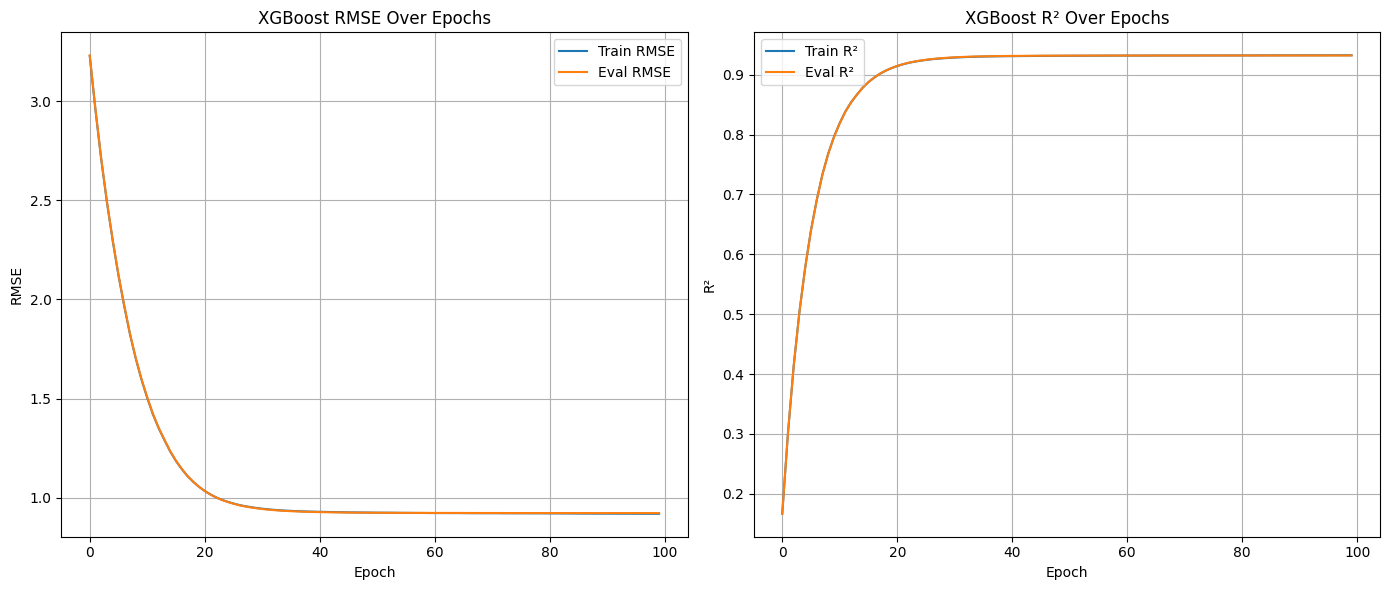

Final Model Performance:
 - Mean Squared Error: 0.8509
 - R² Score: 0.9321

Model Parameters:
   objective: reg:squarederror
   learning_rate: 0.1
   max_depth: 5
   seed: 42
Number of Boosting Rounds: 100

Predicted Compatibility Score for emp_10: 10.5828


In [178]:
import pandas as pd
import numpy as np
import json
from ast import literal_eval
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import joblib

tqdm.pandas()  # Enable progress_apply for pandas

# ----------------------------- Step 1: Load and Preprocess Data -----------------------------
# Simulate a DataFrame with columns:
# Employee_ID, Skills, Expertise, Experience, Compatibility, Free_Time, Feedback
# Skills is a JSON list of skill names and Expertise is a JSON list of corresponding ratings.

data = {
    "Employee_ID": [f"emp_{i}" for i in range(1, 201)],
    "Skills": [json.dumps(["Python", "SQL", "ML"]) for _ in range(200)],
    "Expertise": [json.dumps([np.random.randint(1, 11) for _ in range(3)]) for _ in range(200)],
    "Experience": np.random.randint(1, 21, size=200),
    "Compatibility": np.random.uniform(0.5, 1.0, size=200),
    "Free_Time": np.random.randint(10, 41, size=200),
    "Feedback": np.random.uniform(5, 10, size=200)
}
df = df3

# Function to extract expertise summary features from the Expertise JSON string
def extract_expertise_features(expertise_str):
    try:
        expertise_list = literal_eval(expertise_str)
    except Exception:
        expertise_list = []
    if expertise_list:
        avg_expertise = np.mean(expertise_list)
        max_expertise = np.max(expertise_list)
    else:
        avg_expertise = 0
        max_expertise = 0
    return pd.Series({"avg_expertise": avg_expertise, "max_expertise": max_expertise})

# Apply feature extraction with a progress bar
expertise_features = df["Expertise"].progress_apply(extract_expertise_features)
df = pd.concat([df, expertise_features], axis=1)

# Define features and target variable
features = ["avg_expertise", "max_expertise", "Experience", "Free_Time", "Feedback"]
target = "Compatibility"

X = df[features]
y = df[target]

# Optionally encode Employee_ID if needed (not used directly in prediction here)
label_encoder_emp = LabelEncoder()
df["Employee_ID_enc"] = label_encoder_emp.fit_transform(df["Employee_ID"])
# X["Employee_ID_enc"] = df["Employee_ID_enc"]  # Uncomment if including as feature

# ----------------------------- Step 2: Split and Scale Data -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# ----------------------------- Step 3: Custom Callback for R² -----------------------------
# We define a custom callback to compute and store R² after each boosting round.
class R2Callback(xgb.callback.TrainingCallback):
    def __init__(self):
        self.train_r2 = []
        self.eval_r2 = []
    
    def after_iteration(self, model, epoch, evals_log):
        # Predictions on train and eval sets for current model state
        train_preds = model.predict(dtrain)
        eval_preds = model.predict(dtest)
        train_r2_val = r2_score(y_train, train_preds)
        eval_r2_val = r2_score(y_test, eval_preds)
        self.train_r2.append(train_r2_val)
        self.eval_r2.append(eval_r2_val)
        return False  # Return False to indicate training should continue

r2_callback = R2Callback()

# ----------------------------- Step 4: Train the Model with Evaluation Metrics -----------------------------
params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.1,
    "max_depth": 5,
    "seed": 42
}
num_rounds = 100  # Number of boosting rounds

evals_result = {}
watchlist = [(dtrain, "train"), (dtest, "eval")]

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_rounds,
    evals=watchlist,
    evals_result=evals_result,
    callbacks=[r2_callback],
    verbose_eval=False
)

# Save the model and preprocessing objects
joblib.dump(model, "comp_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder_emp, "label_encoder_emp.pkl")

# ----------------------------- Step 5: Plot Training Metrics -----------------------------
epochs = len(evals_result["train"]["rmse"])
x_axis = range(epochs)

plt.figure(figsize=(14, 6))

# Plot RMSE over epochs
plt.subplot(1, 2, 1)
plt.plot(x_axis, evals_result["train"]["rmse"], label="Train RMSE")
plt.plot(x_axis, evals_result["eval"]["rmse"], label="Eval RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("XGBoost RMSE Over Epochs")
plt.legend()
plt.grid(True)

# Plot R² over epochs
plt.subplot(1, 2, 2)
plt.plot(x_axis, r2_callback.train_r2, label="Train R²")
plt.plot(x_axis, r2_callback.eval_r2, label="Eval R²")
plt.xlabel("Epoch")
plt.ylabel("R²")
plt.title("XGBoost R² Over Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ----------------------------- Step 6: Final Evaluation -----------------------------
y_pred = model.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
r2_final = r2_score(y_test, y_pred)

print("Final Model Performance:")
print(f" - Mean Squared Error: {mse:.4f}")
print(f" - R² Score: {r2_final:.4f}")

# Display additional model details
print("\nModel Parameters:")
for key, value in params.items():
    print(f"   {key}: {value}")
print(f"Number of Boosting Rounds: {num_rounds}")

# ----------------------------- Step 7: Model Inference -----------------------------
def predict_compatibility(employee_id, input_features):
    """
    Predict compatibility for a given employee.
    input_features should be a dict with keys: avg_expertise, max_expertise, Experience, Free_Time, Feedback
    """
    # Optionally, encode Employee_ID if including it as a feature:
    # employee_encoded = label_encoder_emp.transform([employee_id])[0]
    # input_features["Employee_ID_enc"] = employee_encoded

    input_df = pd.DataFrame([input_features])
    input_scaled = scaler.transform(input_df)
    dinput = xgb.DMatrix(input_scaled)
    
    score = model.predict(dinput)[0]
    return score

# Example Prediction:
example_employee_id = "emp_10"
example_features = {
    "avg_expertise": 10,
    "max_expertise": 10,
    "Experience": 10,
    "Free_Time": 1,
    "Feedback": 10
}

predicted_score = predict_compatibility(example_employee_id, example_features)
print(f"\nPredicted Compatibility Score for {example_employee_id}: {predicted_score:.4f}")


In [179]:
import sys
sys.path.append('/Users/LAKSHAY CHHABRA/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0/LocalCache/local-packages/Python313/site-packages')

In [180]:
example_employee_id = "emp_10"
example_features = {
    "avg_expertise": 0,
    "max_expertise": 0,
    "Experience": 0,
    "Free_Time": 0,
    "Feedback": 0
}

predicted_score = predict_compatibility(example_employee_id, example_features)
predicted_score = ((predicted_score - 2.089185)/8.5033)*100
print(f"\nPredicted Compatibility Score for {example_employee_id}: {predicted_score:.4f}")


Predicted Compatibility Score for emp_10: 1.7848
